# RFM Customer segmentation

<br>

## RFM scoring을 기반으로 고객 세그먼테이션 진행

* 고객들을 RFM Score기반으로 분류하여 집단 별 현황 및 targeting 설계

In [108]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)

sns.set()
%matplotlib inline

In [64]:
df_ori = pd.read_excel(io='C:/Users/KIHyuk/Desktop/dacon_data/CRM/UCI_Online_Retail/Online Retail.xlsx')

In [84]:
df = df_ori.copy()

In [85]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [87]:
print("Customer ID 결측치 : ",df['CustomerID'].isnull().sum())

Customer ID 결측치 :  135080


In [88]:
df = df[df['CustomerID'].notnull()]

In [89]:
df['Country'].value_counts()
print("전체 국가중 United Kingdom 비율 : ",len(df[df['Country']== 'United Kingdom'])/len(df))

전체 국가중 United Kingdom 비율 :  0.8895088599878573


In [90]:
df = df[df['Country'] == 'United Kingdom']
df.shape

(361878, 8)

In [91]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [92]:
print(df.Quantity.describe())
df = df[df['Quantity'] > 0]

count    361878.000000
mean         11.077029
std         263.129266
min      -80995.000000
25%           2.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64


In [93]:
print(df.UnitPrice.describe())
df = df[df['UnitPrice'] > 0]

count    354345.000000
mean          2.963793
std          17.862067
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64


##  RFM 기반 데이터 가공
- R (Recency): 거래의 최근성 / 최근 언제 구입했는지
- F (Frequency): 거래의 빈도 / 얼마나 자주 구입했는지
- M (Monetary): 거래의 규모 / 얼마나 많이 구입했는지

In [94]:
df['sale_amount'] = df['Quantity'] * df['UnitPrice']

In [95]:
print("United Kingdom의 총 고객수 : ",df['CustomerID'].nunique())

United Kingdom의 총 고객수 :  3920


In [96]:
df['CustomerID'].value_counts().head(10)

17841.0    7847
14096.0    5111
12748.0    4595
14606.0    2700
15311.0    2379
13089.0    1818
13263.0    1677
14298.0    1637
15039.0    1502
18118.0    1279
Name: CustomerID, dtype: int64

In [99]:
df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)

CustomerID
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
17511.0     91062.38
16029.0     81024.84
             ...    
16878.0        13.30
17956.0        12.75
16454.0         6.90
14792.0         6.20
16738.0         3.75
Name: sale_amount, Length: 3920, dtype: float64

In [101]:
# 개별 고객 기준데이터로 변경

aggregations = {
    "InvoiceDate" : 'max', # 고객별 가장 최근 구매일
    "InvoiceNo" : 'count', # 고객별 구매 횟수 
    "sale_amount" : "sum" # 고객별 구매합계
}

cust_df = df.groupby('CustomerID').agg(aggregations)

cust_df = cust_df.rename(columns={'InvoiceDate':'Recency', 
                                 'InvoiceNo':'Frequency',  
                                 'sale_amount':'Monetary' 
                                 }
                        )

cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:01:00,1,77183.60
1,12747.0,2011-12-07 14:34:00,103,4196.01
2,12748.0,2011-12-09 12:20:00,4595,33719.73


In [102]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency'] 
cust_df['Recency'] = cust_df['Recency'].apply(lambda x:x.days+1)
print('cust_df 로우와 컬럼 수는 : ',cust_df.shape)
cust_df.head(3)

cust_df 로우와 컬럼 수는 :  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12747.0,3,103,4196.01
2,12748.0,1,4595,33719.73


           Recency    Frequency       Monetary
count  3920.000000  3920.000000    3920.000000
mean     92.742092    90.388010    1864.385601
std      99.533485   217.808385    7482.817477
min       1.000000     1.000000       3.750000
25%      18.000000    17.000000     300.280000
50%      51.000000    41.000000     652.280000
75%     143.000000    99.250000    1576.585000
max     374.000000  7847.000000  259657.300000


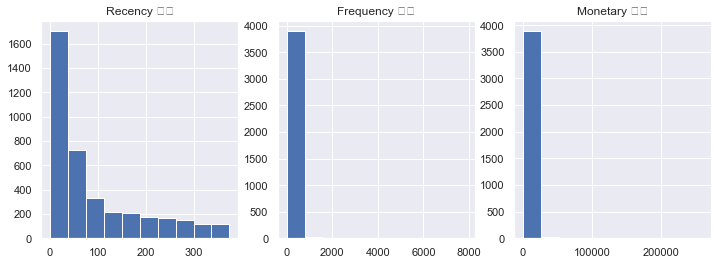

In [106]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4),nrows=1,ncols=3)
ax1.set_title('Recency 분포')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency 분포')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary 분포')
ax3.hist(cust_df['Monetary'])

print(cust_df[['Recency','Frequency','Monetary']].describe())

In [111]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [113]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

# 
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

#
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3,random_state=0)
labels= kmeans.fit_predict(X_features_scaled)

cust_df['cluster_label'] = labels

print("silhouette_score : ",silhouette_score(X_features_scaled,labels))

silhouette_score :  0.3033962891425885


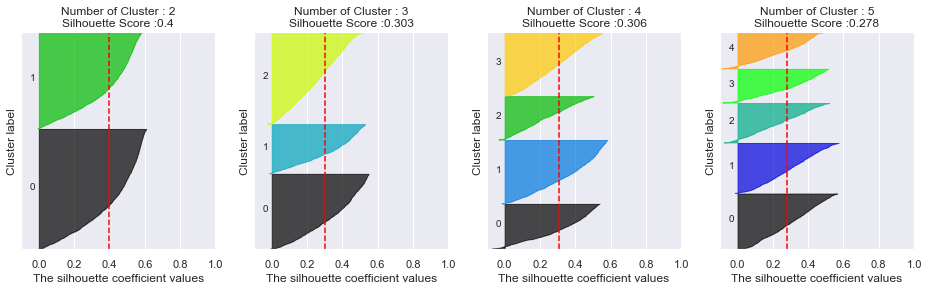

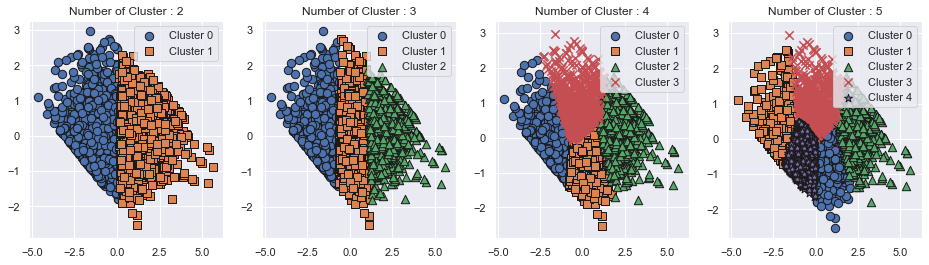

In [116]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)